# Introduction to Financial Engineering [IE471]
##  Hands-on Practice on Financial AI Session #2

### 1. Cleaning the Twitter Data

In [1]:
# Import necessary libraries
import pandas as pd
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')
stopword_list = nltk.corpus.stopwords.words('english')
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import wordnet

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import datetime
from tqdm import tqdm # See how much time is remaining in for loops

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/fedebotu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/fedebotu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /home/fedebotu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/fedebotu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Read in and preview 'tesla_data.csv'

tweets = pd.read_csv('tesla_data.csv').drop(['Unnamed: 0'],axis=1)
tweets.head()

,id,date,tweet,retweets_count
0,1212450794705969152,2020-01-02,Fun fact: Audi registered more E-Tron's in the...,2
1,1212450579634626560,2020-01-02,That MF TSLA stock at 420.. I watch that shit ...,0
2,1212450337543602177,2020-01-02,@ICannot_Enough And on June 5 th 2019 within 2...,0
3,1212450309131227141,2020-01-02,Tesla is gaining momentum in Taiwan 🇹🇼 @TeslaO...,15
4,1212449703318753280,2020-01-02,@Schuldensuehner Now extrapolate these numbers...,0


In [3]:
# Convert date_time column into datetime stamp
tweets.date = pd.to_datetime(tweets.date)

### 2. Clean & Tokenize Tweets

In [4]:
def cleaner(dataframe):
    # Add whitespace to the end of every tweet
    dataframe['cleaned_tweet'] = dataframe.tweet.map(lambda x: x + " ") 
    # Remove http links
    dataframe.cleaned_tweet = dataframe.cleaned_tweet.map(lambda x: re.sub(r'http.*', '', x))
    # Remove special characters and numbers
    dataframe.cleaned_tweet = dataframe.cleaned_tweet.map(lambda x: re.sub(r"[^a-zA-Z#]", ' ', x))
    # Lowercase all tweets
    dataframe.cleaned_tweet = dataframe.cleaned_tweet.map(lambda x: x.lower())
    #Tokenize tweets and remove stop words
    stopword_list = stopwords.words('english')
    for i in tqdm(range(len(dataframe.cleaned_tweet))):
        tokens = word_tokenize(dataframe.cleaned_tweet[i])
        clean_tokens = [w for w in tokens if w not in stopword_list]
        dataframe.cleaned_tweet[i] = clean_tokens

In [5]:
cleaner(tweets)
tweets.head()

  0%|          | 0/113741 [00:00<?, ?it/s]<ipython-input-4-88a107c10dc8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.cleaned_tweet[i] = clean_tokens
100%|██████████| 113741/113741 [04:49<00:00, 393.53it/s]


,id,date,tweet,retweets_count,cleaned_tweet
0,1212450794705969152,2020-01-02,Fun fact: Audi registered more E-Tron's in the...,2,"[fun, fact, audi, registered, e, tron, netherl..."
1,1212450579634626560,2020-01-02,That MF TSLA stock at 420.. I watch that shit ...,0,"[mf, tsla, stock, watch, shit, go, damn, year,..."
2,1212450337543602177,2020-01-02,@ICannot_Enough And on June 5 th 2019 within 2...,0,"[icannot, enough, june, th, within, days, tsla..."
3,1212450309131227141,2020-01-02,Tesla is gaining momentum in Taiwan 🇹🇼 @TeslaO...,15,"[tesla, gaining, momentum, taiwan, teslaowners..."
4,1212449703318753280,2020-01-02,@Schuldensuehner Now extrapolate these numbers...,0,"[schuldensuehner, extrapolate, numbers, anothe..."


### 3. Lemmatize Tweets

In [6]:
tweets.cleaned_tweet[0]

['fun',
 'fact',
 'audi',
 'registered',
 'e',
 'tron',
 'netherlands',
 'q',
 'tesla',
 'sux',
 'combined',
 'q',
 'obviously',
 'orders',
 'magnitudes',
 'tesla',
 'q',
 'tslaq',
 'tsla']

In [7]:
def tweet_lemmatizer(tweets):
    
    for i in tqdm(range(len(tweets))):
        # Pos-tag each word in tweet
        for word in [tweets[i]]:
            pos_tag_list = nltk.pos_tag(word)
        # Convert pos-tag to be wordnet compliant
        wordnet_tags = []
        for j in pos_tag_list:
            # Adjective
            if j[1].startswith('J'):
                wordnet_tags.append(wordnet.ADJ)
            # Noun
            elif j[1].startswith('N'):
                wordnet_tags.append(wordnet.NOUN)
            # Adverb
            elif j[1].startswith('R'):
                wordnet_tags.append(wordnet.ADV)
            # Verb
            elif j[1].startswith('V'):
                wordnet_tags.append(wordnet.VERB)
            # Default to noun
            else:
                wordnet_tags.append(wordnet.NOUN)
        # Lemmatize each word in tweet
        lem_words = []
        for k in range(len(tweets[i])):
            lem_words.append(lemmatizer.lemmatize(tweets[i][k], pos=wordnet_tags[k]))
        lem_tweet = ' '.join(lem_words)
        tweets[i] = lem_tweet

In [8]:
tweet_lemmatizer(tweets.cleaned_tweet)
tweets

  0%|          | 0/113741 [00:00<?, ?it/s]<ipython-input-7-2789e7e6f40e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets[i] = lem_tweet
100%|██████████| 113741/113741 [55:26<00:00, 34.19it/s]   


,id,date,tweet,retweets_count,cleaned_tweet
0,1212450794705969152,2020-01-02,Fun fact: Audi registered more E-Tron's in the...,2,fun fact audi register e tron netherlands q te...
1,1212450579634626560,2020-01-02,That MF TSLA stock at 420.. I watch that shit ...,0,mf tsla stock watch shit go damn year miss curve
2,1212450337543602177,2020-01-02,@ICannot_Enough And on June 5 th 2019 within 2...,0,icannot enough june th within day tsla low rep...
3,1212450309131227141,2020-01-02,Tesla is gaining momentum in Taiwan 🇹🇼 @TeslaO...,15,tesla gain momentum taiwan teslaownerstwn tsla...
4,1212449703318753280,2020-01-02,@Schuldensuehner Now extrapolate these numbers...,0,schuldensuehner extrapolate number another two...
...,...,...,...,...,...
113736,1344758979721789440,2021-01-01,#TSLA whales stepping in for the last day of t...,1,# tsla whale step last day year
113737,1344758920775086081,2021-01-01,I’ve always wanted to get into investing and t...,0,always want get invest understand stock market...
113738,1344758902856945664,2021-01-01,@RampCapitalLLC $OPEN little buddy told me is ...,0,rampcapitalllc open little buddy tell run mayb...
113739,1344758889393184769,2021-01-01,Fantastic week. Thanks for the huge support in...,1,fantastic week thanks huge support look forwar...


In [9]:
tweets.cleaned_tweet[0]

'fun fact audi register e tron netherlands q tesla sux combine q obviously order magnitude tesla q tslaq tsla'

In [10]:
# Remove 'tesla, 'tsla', 'q', and '#'

def final_cleaner(dataframe):
    dataframe.cleaned_tweet = dataframe.cleaned_tweet.map(lambda x: x.replace('#',''))
    dataframe.cleaned_tweet = dataframe.cleaned_tweet.map(lambda x: x.replace('q',''))
    dataframe.cleaned_tweet = dataframe.cleaned_tweet.map(lambda x: x.replace('tesla',''))
    dataframe.cleaned_tweet = dataframe.cleaned_tweet.map(lambda x: x.replace('tsla',''))

In [11]:
final_cleaner(tweets)

In [12]:
# Join all the tweets into a single string
all_words_string = ' '.join([tweet for tweet in tweets.cleaned_tweet])

# Make a list of all the words in the dataframe
all_words_list = all_words_string.split()

### 4. Frequency Analysis

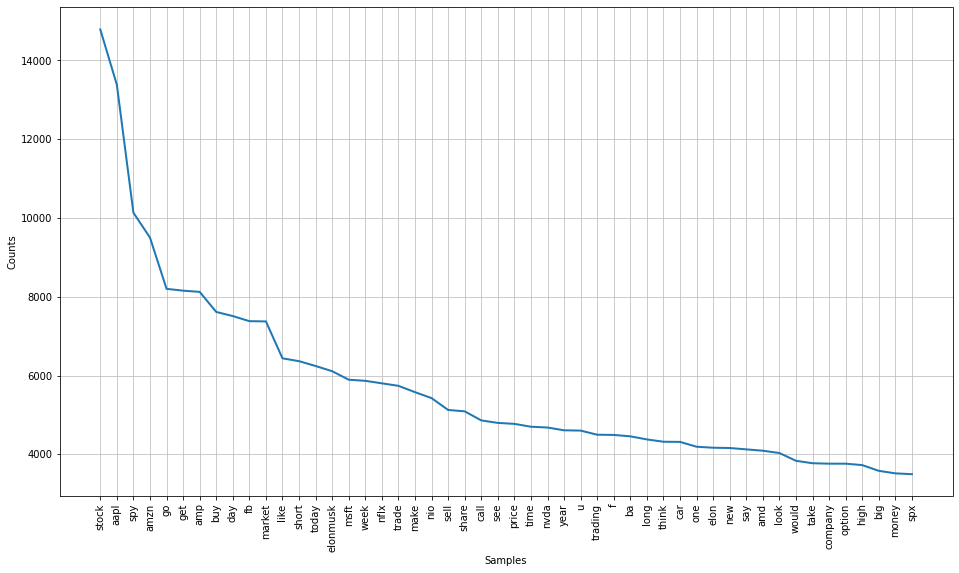

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [13]:
# Plot word frequency distribution of first few words
plt.figure(figsize=(16,9))
plt.xticks(fontsize=10, rotation=90)
freq_dist = nltk.FreqDist(all_words_list)
freq_dist.plot(50, cumulative=False)

In [14]:
plt.rcParams["figure.figsize"] = (16,8)
plt.rcParams["figure.dpi"] = 300
plt.rcParams['axes.grid'] = True 
plt.rcParams.update({'font.size': 20})
plt.style.use('ggplot')

In [42]:
import numpy as np
from PIL import Image
mask = np.array(Image.open('tesla_logo.png'))

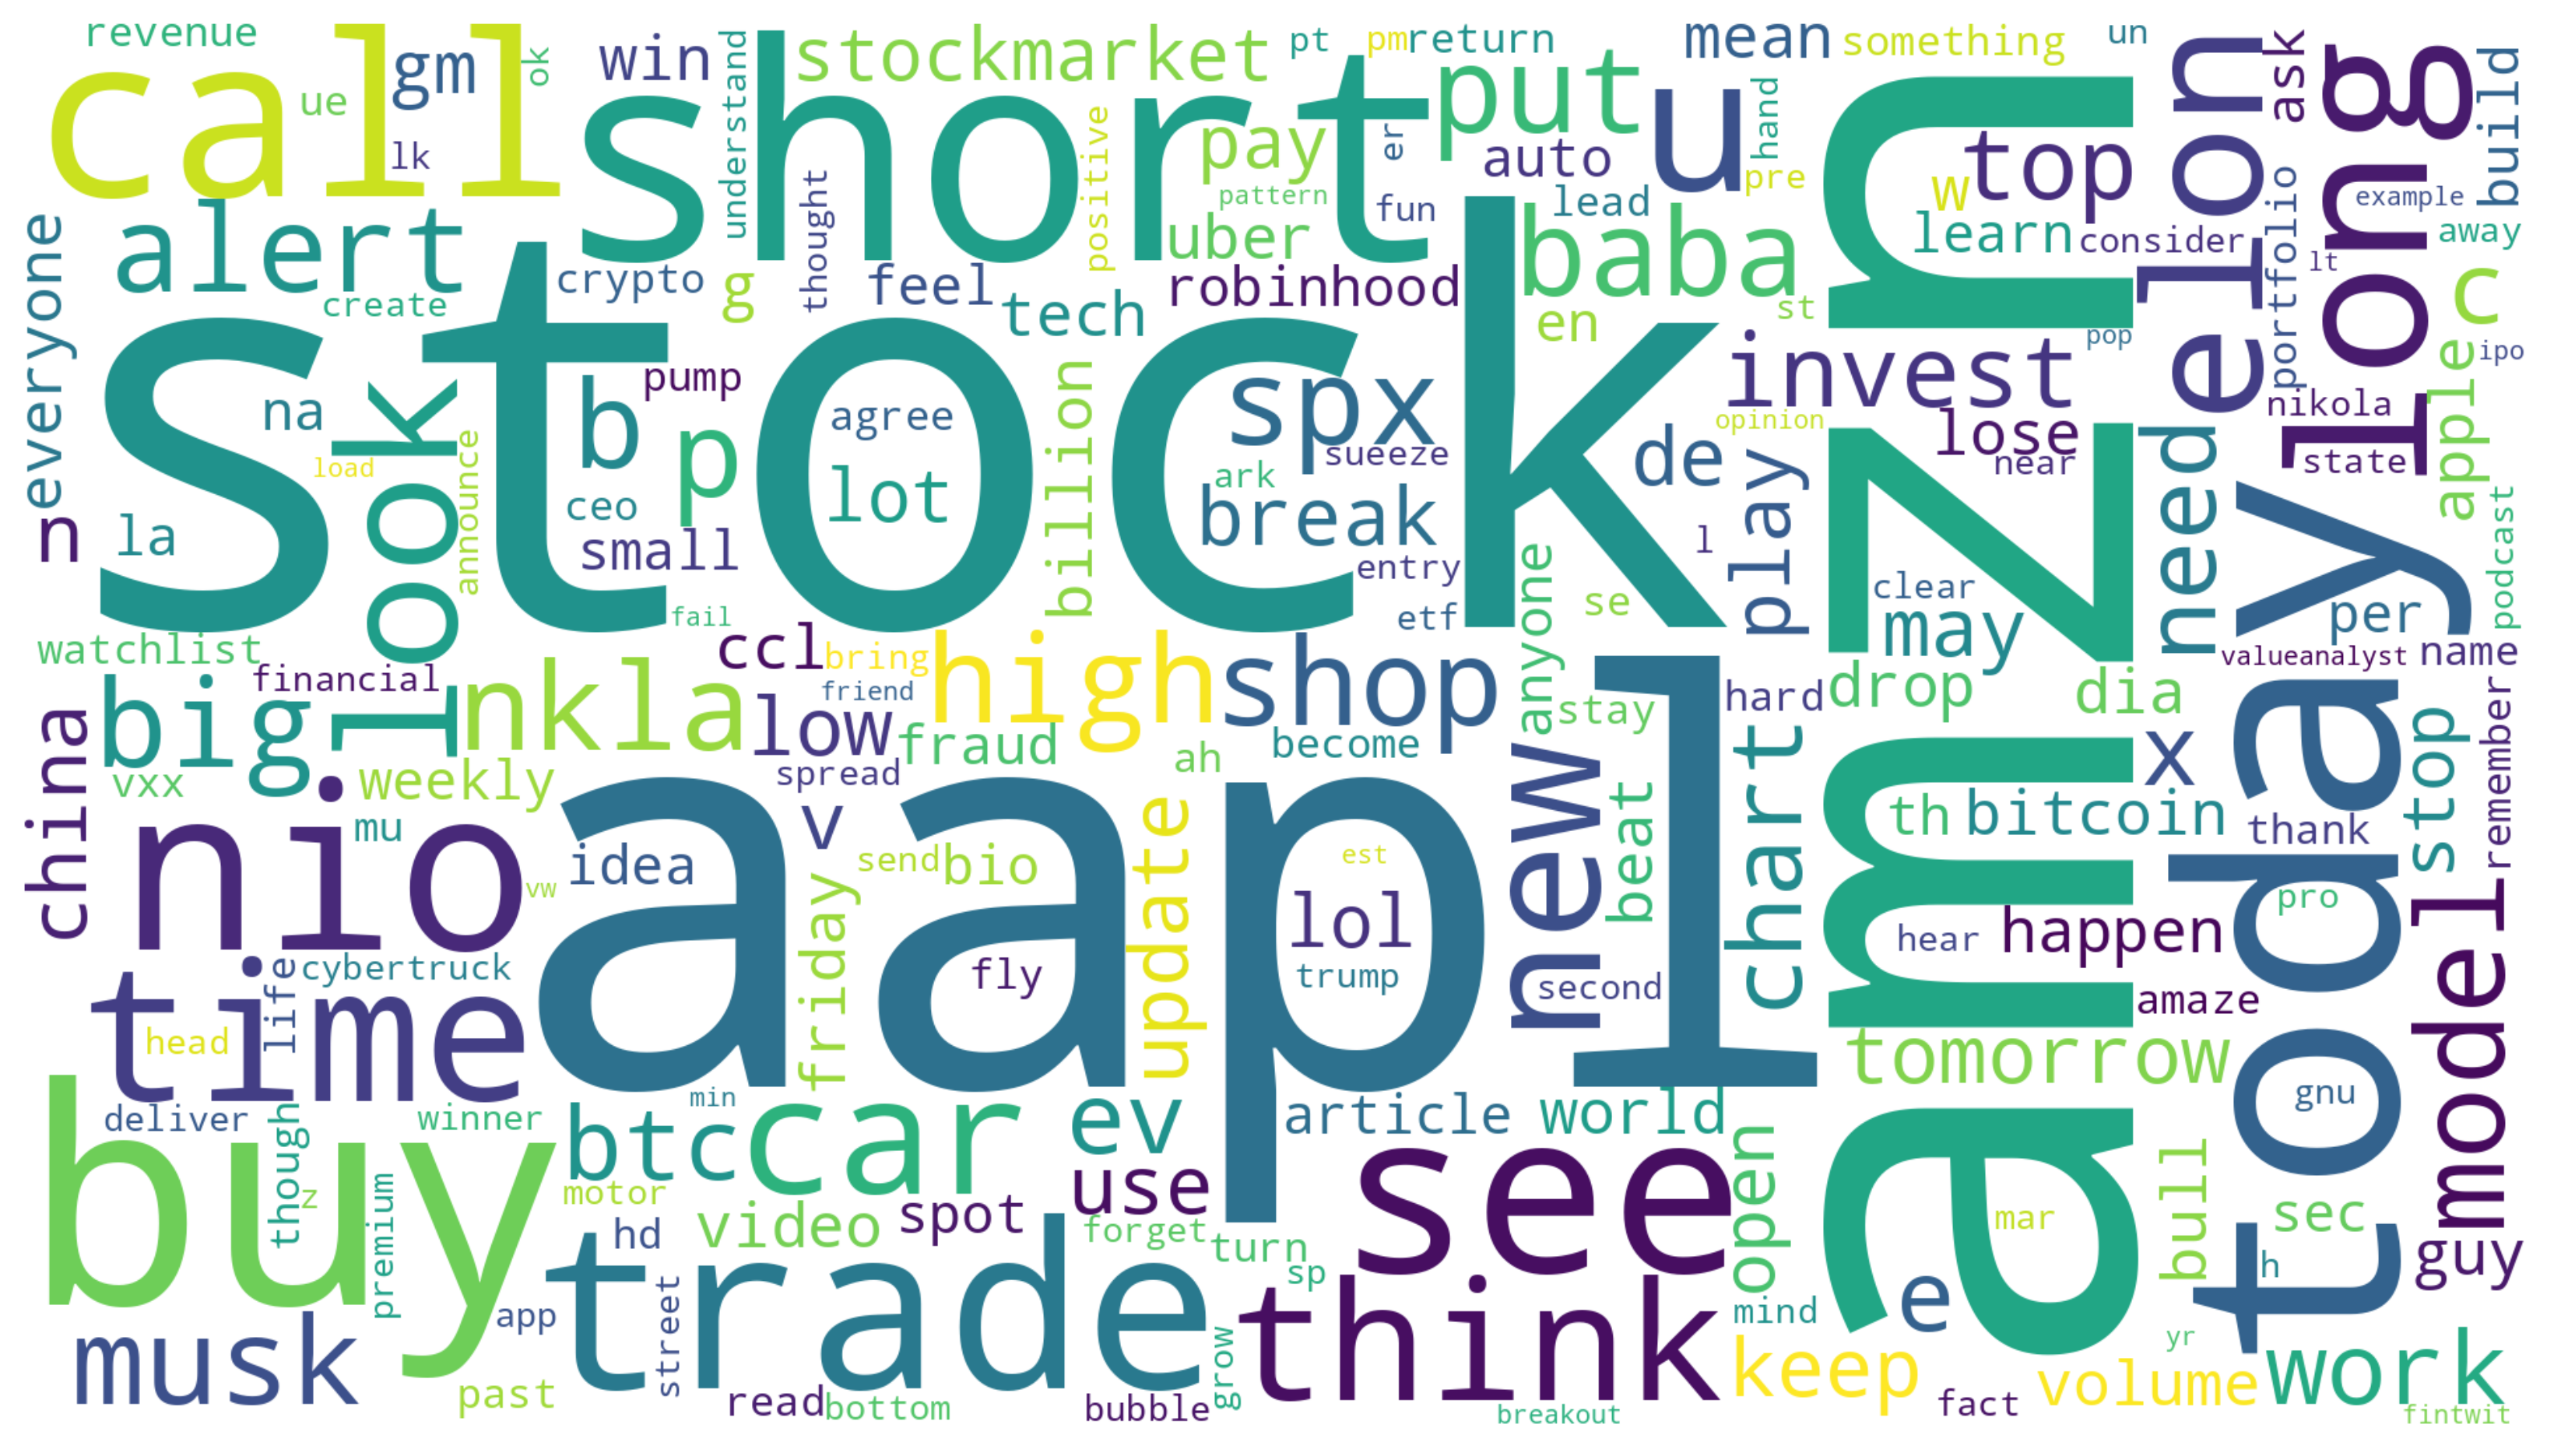

In [54]:
wc = WordCloud(background_color="white",width=1920,
                      height=1080)
clean_string = ','.join(freq_dist)
wc.generate(clean_string)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('images/wordcloud_simple.pdf', bbox_inches='tight')
plt.show()

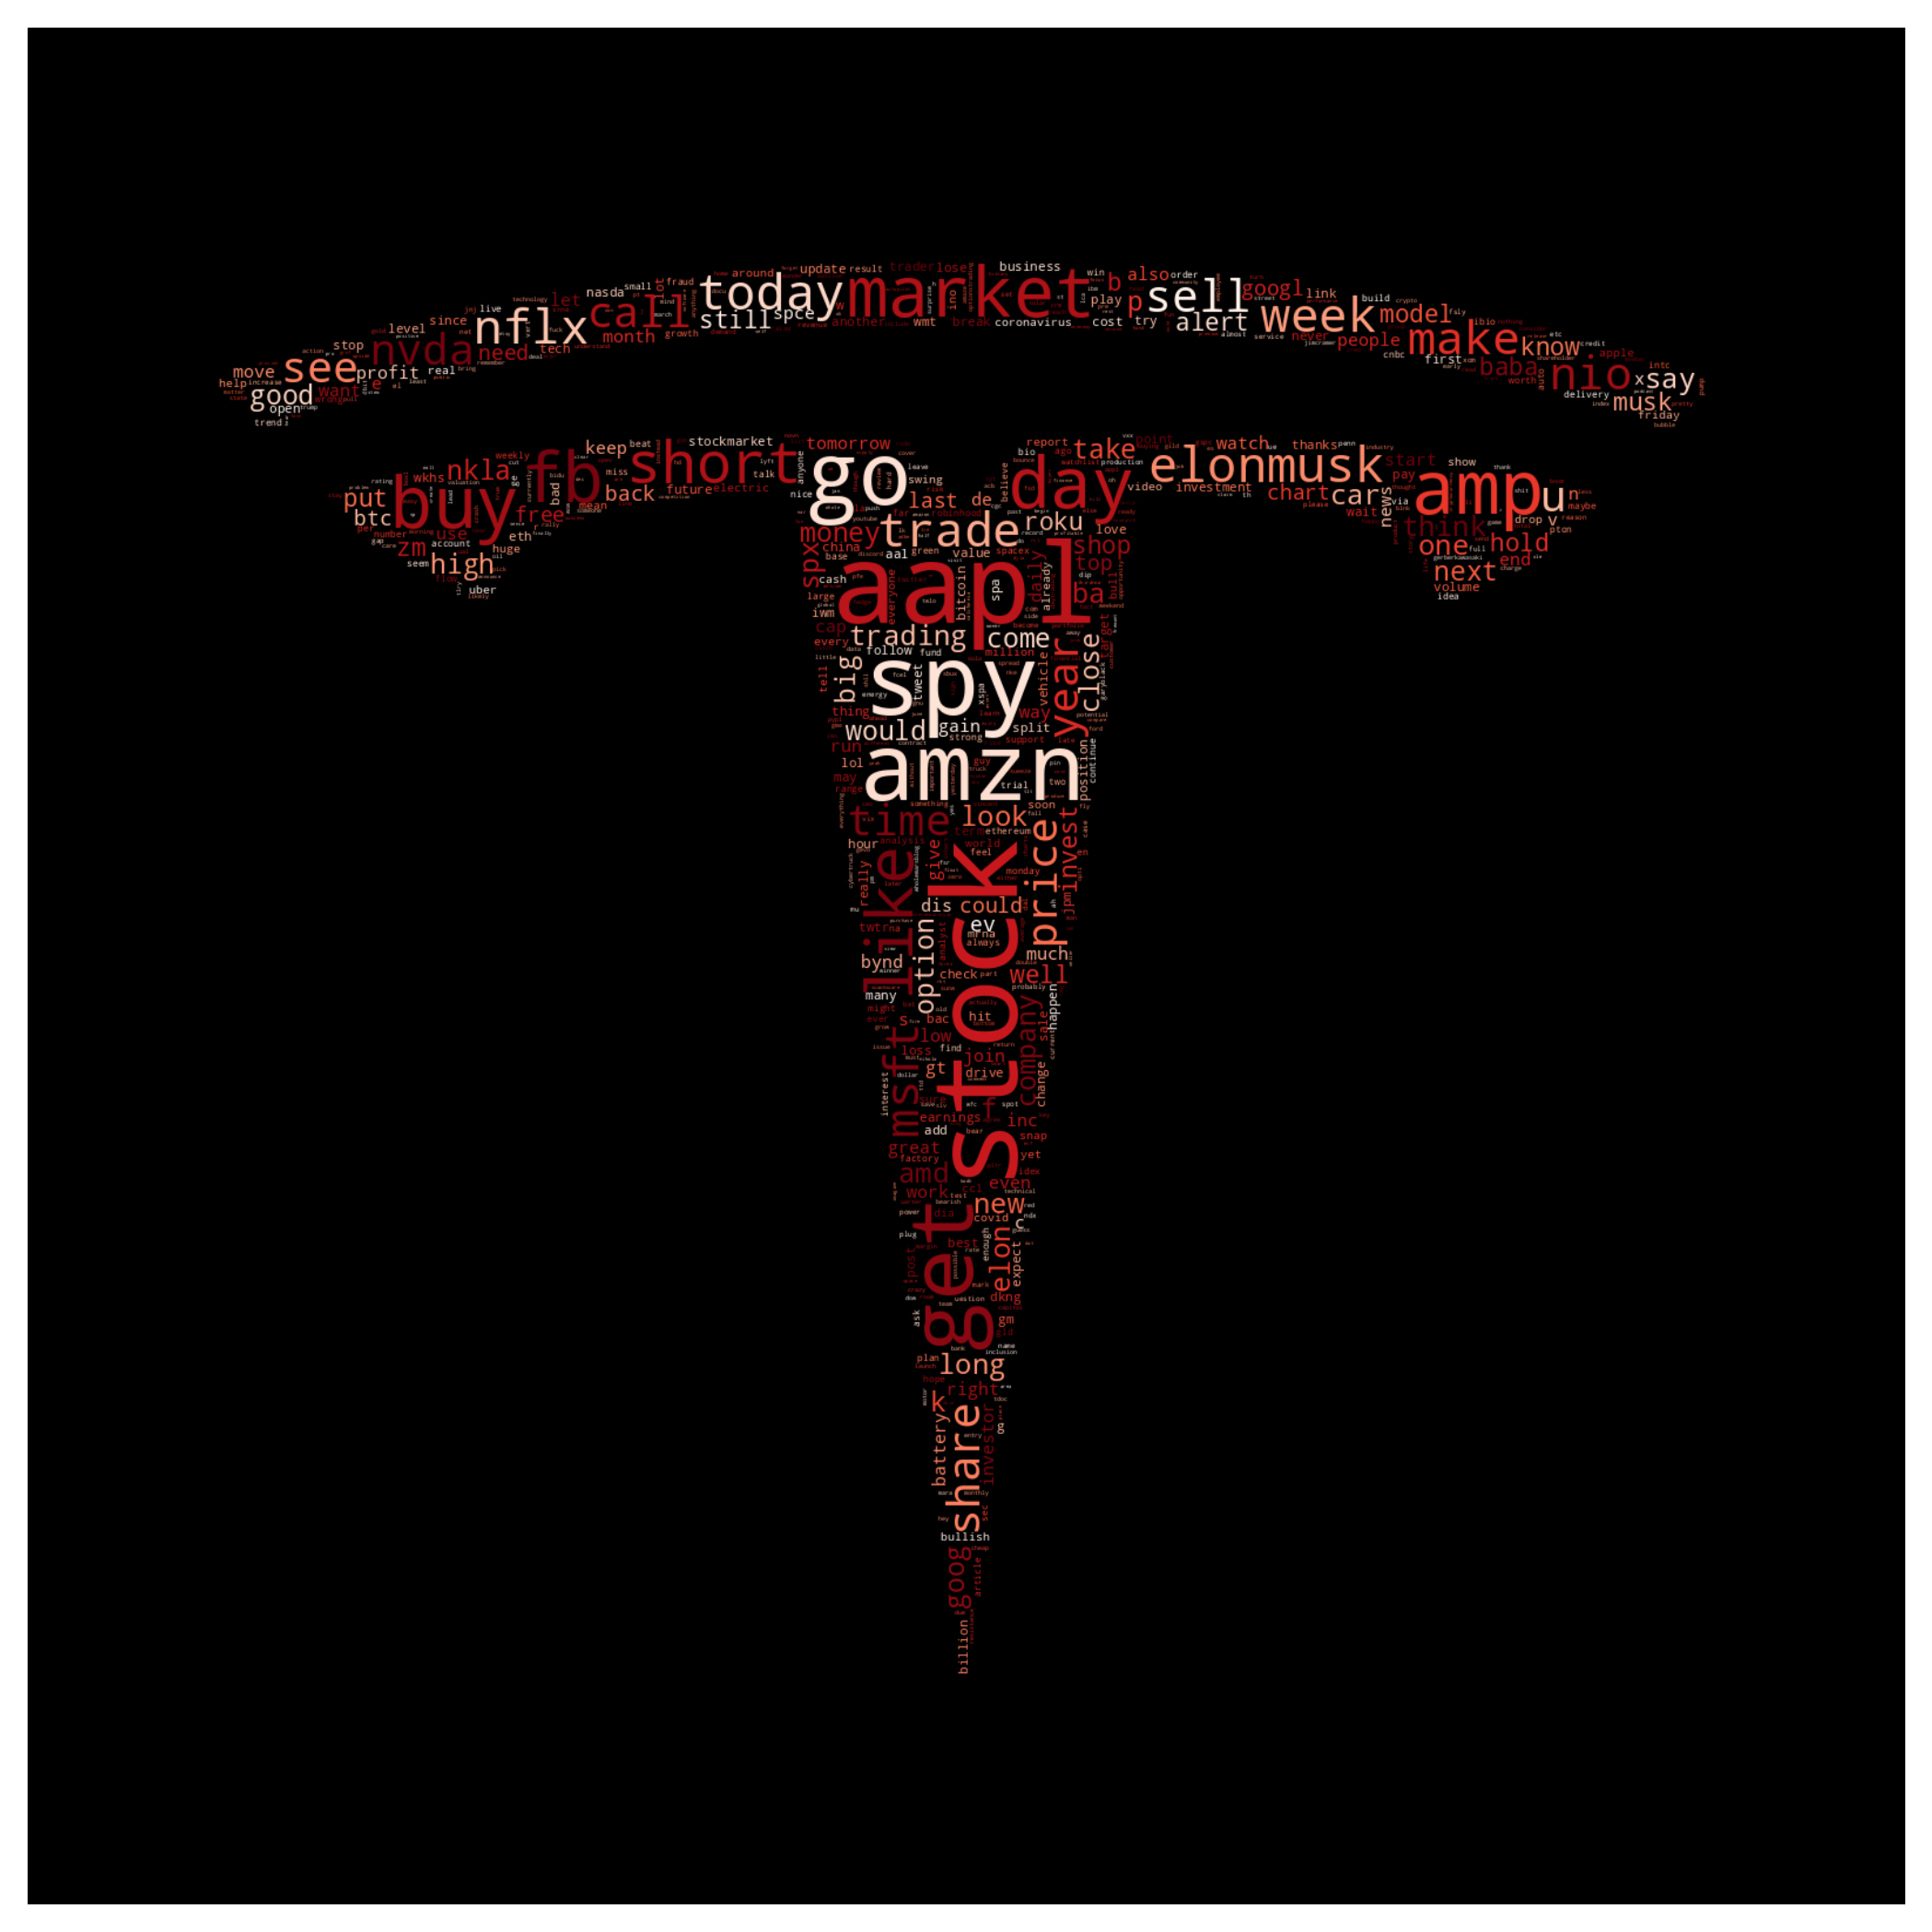

In [44]:
# Word Cloud with word frequencies
wordcloud = WordCloud(width=1920,
                      height=1080,
                      max_words=1000,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Reds',
                      normalize_plurals=True,
                      mask=mask,
#                       contour_width=2, 
                      contour_color='red').generate_from_frequencies(freq_dist)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('images/wordcloud.pdf', bbox_inches='tight')
plt.show()

In [38]:
# Find the frequency of each word in the dataframe

word_freq = nltk.FreqDist(all_words_list)
freq_df = pd.DataFrame({'Word': list(word_freq.keys()), 'Count': list(word_freq.values())}).sort_values(by=['Count'], ascending=False)
freq_df.head(10)

,Word,Count
13,stock,14789
126,aapl,13384
301,spy,10135
129,amzn,9504
16,go,8202
66,get,8155
43,amp,8125
408,buy,7615
26,day,7510
1009,fb,7381


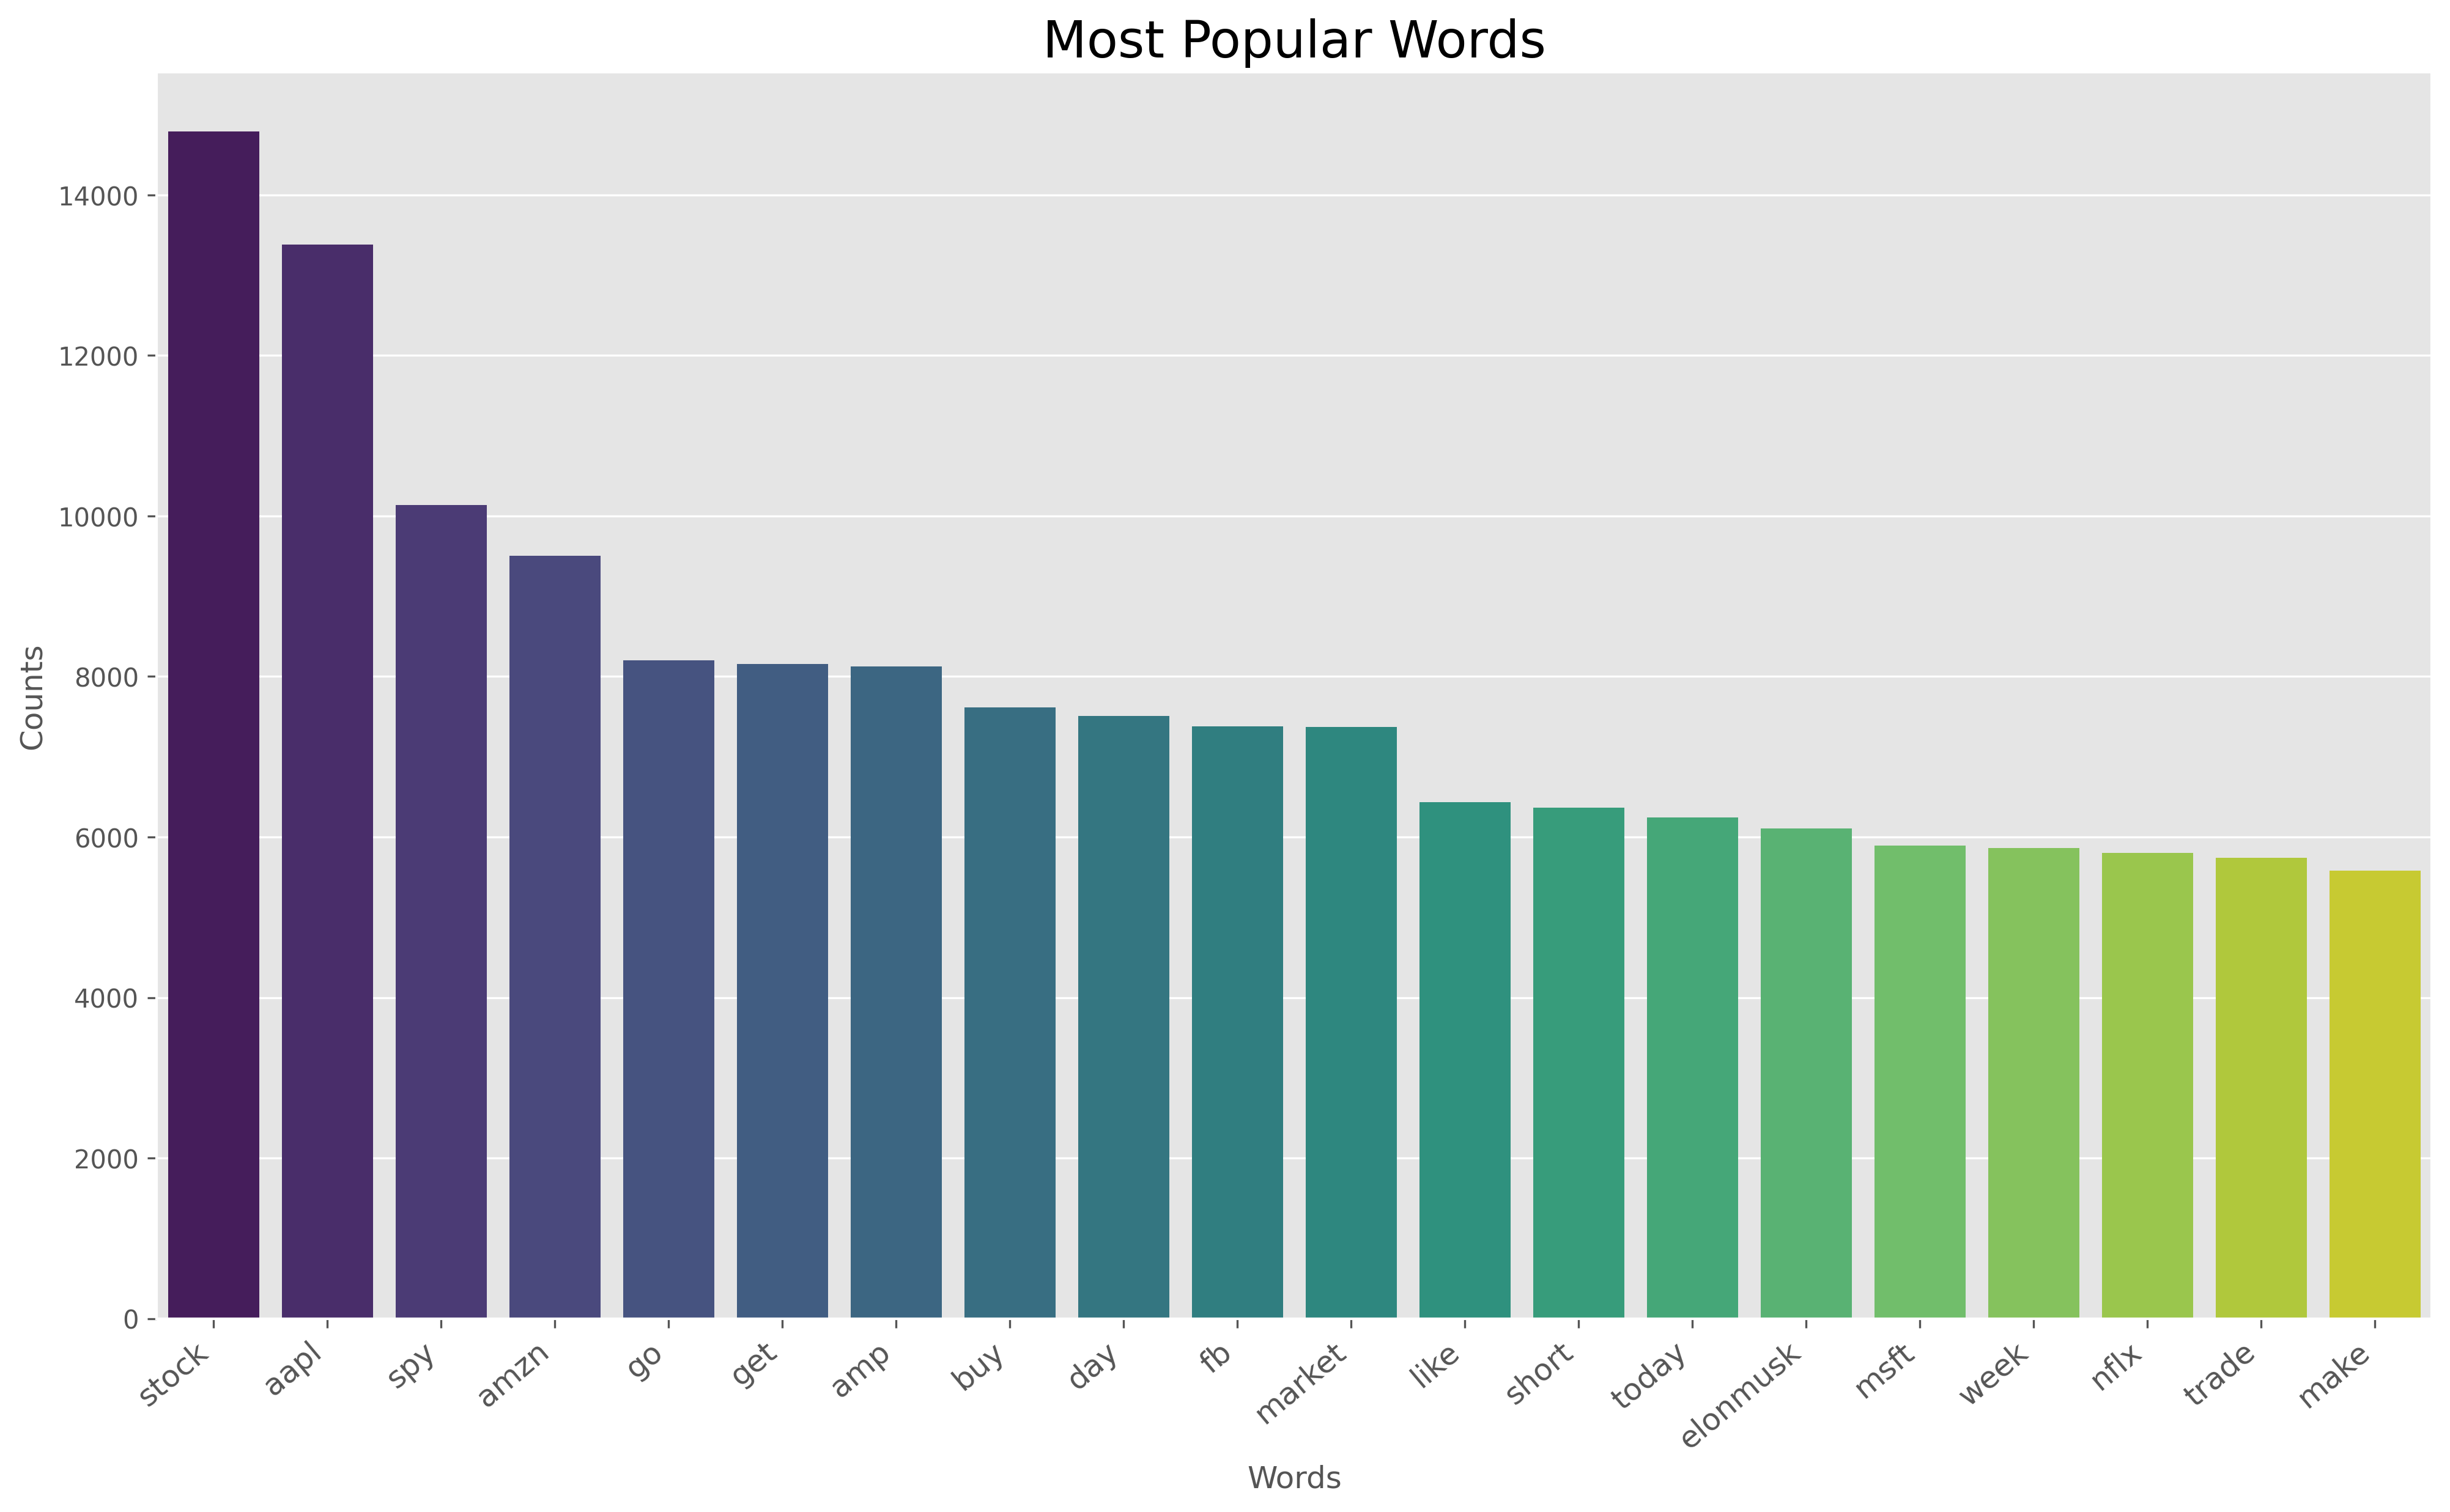

In [47]:
# Plot histogram of most frequent words

freq_df = freq_df.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,9))
ax = sns.barplot(data=freq_df, x= "Word", y = "Count", palette='viridis')
ax.set_ylabel('Counts', fontsize=12)
ax.set_xlabel('Words', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
ax.set_title("Most Popular Words", fontsize=20)
plt.savefig('images/popular_words.pdf', bbox_inches='tight')
plt.show()

### 5. Save the Cleaned Tweets

In [48]:
tweets.to_csv('data/cleaned_data.csv', index=False)